# Read Dataset

In [124]:
from warnings import filterwarnings
filterwarnings("ignore")

In [125]:
import pandas as pd
A = pd.read_csv("E:/D0wnloded/Microsoft.SkypeApp_kzf8qxf38zg5c!App\All/AirPassengers.csv")



# Convert date

In [126]:
A.Month = pd.to_datetime(A.Month)

In [127]:
A.columns = ["Month","Pass"]

In [128]:
A.head(3)

,Month,Pass
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132


# Make Month as index and drop it as a column

In [129]:
A.index = A.Month
A = A.drop(labels=["Month"],axis=1)

In [130]:
A.columms = ["Pass"]

In [131]:
A

,Pass
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


# plot and decompose

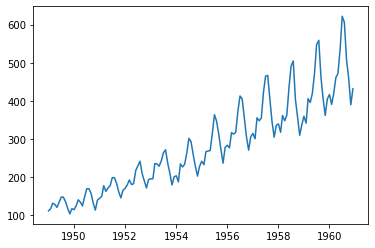

In [132]:
import matplotlib.pyplot as plt
plt.plot(A)

In [133]:
from statsmodels.tsa.seasonal import seasonal_decompose
Q = seasonal_decompose(A,model='multiplicative')

<AxesSubplot:xlabel='Month'>

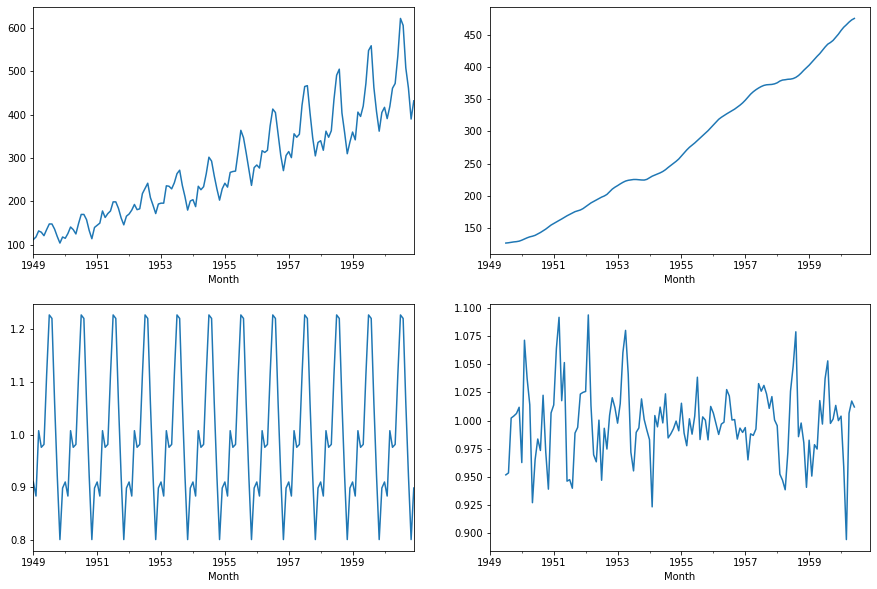

In [134]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
Q.observed.plot()

plt.subplot(2,2,2)
Q.trend.plot()

plt.subplot(2,2,3)
Q.seasonal.plot()

plt.subplot(2,2,4)
Q.resid.plot()

# Rolling mean and Rolling Stdev

In [135]:
RM_original = A.rolling(window=12).mean()
RST_original = A.rolling(window=12).std()

Text(0.5, 1.0, 'Non-stationary')

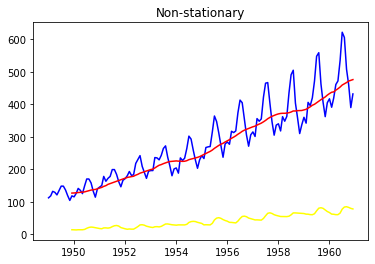

In [136]:
plt.plot(A,c="blue")
plt.plot(RM_original,c="red")
plt.plot(RST_original,c="yellow")
plt.title("Non-stationary")


# Conversion attempt 1
Convert TS --> Log                

ts is non-stationary so convert time series in stationary formate 

In [137]:
import numpy as np

log_A = np.log(A)
RMlog_A = log_A.rolling(window=12).mean()
RSTlog_A = log_A.rolling(window=12).std()

Text(0.5, 1.0, 'non-stationary')

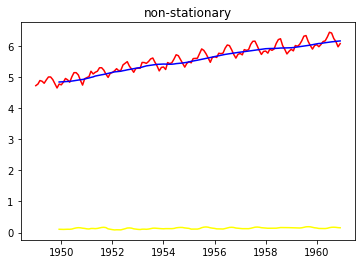

In [138]:
plt.plot(log_A,c="red")
plt.plot(RMlog_A,c="blue")
plt.plot(RSTlog_A,c="yellow")
plt.title("non-stationary")

# Conversion attempt 2:
    square root

Text(0.5, 1.0, 'non-stationary')

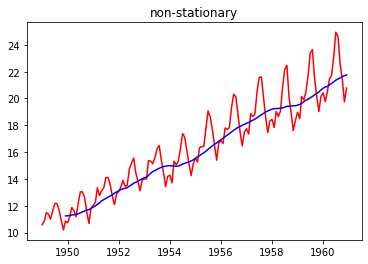

In [139]:
from numpy import sqrt

sr=sqrt(A)
SRRM= sr.rolling(window=12).mean()
plt.plot(sr,c="red")
plt.plot(SRRM,C="blue")
plt.title("non-stationary")

# Conversion attempt 3:
log_A - RM_logA

In [140]:
log_a = np.log(A)
RM_log_a = log_a.rolling(window=12).mean()

In [141]:
ts1=log_a -RM_log_a

In [142]:
rm_ts1=ts1.rolling(window=12).mean()

Text(0.5, 1.0, 'stationary')

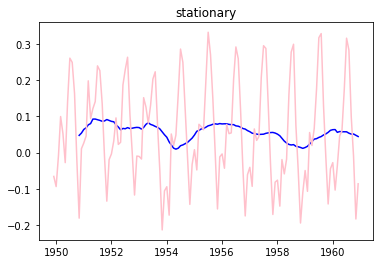

In [143]:
#plt.plot(log_a,c="red")
#plt.plot(RM_log_a,c="yellow")
plt.plot(rm_ts1,c="blue")
plt.plot(ts1,c="pink")
plt.title("stationary")

# Divide Data in training and testing set

In [145]:
TS1_upd = ts1[ts1.Pass.isna()==False]

In [149]:
TS1_upd.shape

(133, 1)

In [150]:
133*0.8

106.4

In [151]:
trd = TS1_upd[0:106]
tsd = TS1_upd[106:]

# Create an autoregression forecasting model

In [153]:
from statsmodels.tsa.ar_model import AR

ar = AR(trd).fit()
pred = ar.predict(start="1958-10-01",end="1960-12-01")

# conversion

q = log(A) - RM_log_A

log(A) = q + RM_log_A

A = EXP(q + RM_log_A)

In [157]:
RM_log_a.shape

(144, 1)

In [158]:
pred.index

DatetimeIndex(['1958-10-01', '1958-11-01', '1958-12-01', '1959-01-01',
               '1959-02-01', '1959-03-01', '1959-04-01', '1959-05-01',
               '1959-06-01', '1959-07-01', '1959-08-01', '1959-09-01',
               '1959-10-01', '1959-11-01', '1959-12-01', '1960-01-01',
               '1960-02-01', '1960-03-01', '1960-04-01', '1960-05-01',
               '1960-06-01', '1960-07-01', '1960-08-01', '1960-09-01',
               '1960-10-01', '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [160]:
RM_log_a_new = RM_log_a[RM_log_a.Pass.isna()==False][106:]

In [163]:
Q1 = pd.DataFrame(pred)

In [165]:
Q1.columns=["Pass"]

In [166]:
from numpy import exp
pred_final = exp(RM_log_a_new + Q1)

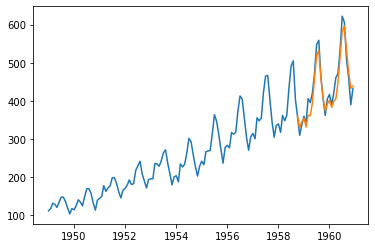

In [167]:
plt.plot(A)
plt.plot(pred_final)

In [168]:
pred_final

,Pass
Month,
1958-10-01,362.074874
1958-11-01,329.665472
1958-12-01,345.022132
1959-01-01,355.254891
1959-02-01,331.825018
1959-03-01,362.397462
1959-04-01,361.557750
1959-05-01,394.308061
1959-06-01,459.595119


In [172]:
from statsmodels.tsa.ar_model import AR

ar = AR(trd).fit()
pred1 = ar.predict(end="1963-12-01")

# Prediction for 1961-1963

In [173]:
T = RM_log_a[RM_log_a.Pass.isna()==False]

In [174]:
ar = AR(T).fit()
pred2 = ar.predict(end="1963-12-01")

In [175]:
pred1.head(5)

1950-12-01   -0.106354
1951-01-01   -0.015329
1951-02-01   -0.018977
1951-03-01    0.097609
1951-04-01    0.051450
Freq: MS, dtype: float64

In [176]:
pred2.head(5)

1951-01-01    4.945380
1951-02-01    4.968468
1951-03-01    4.982135
1951-04-01    5.001613
1951-05-01    5.018792
Freq: MS, dtype: float64

In [177]:
pred2.shape

(156,)

In [178]:
pred1.shape

(157,)

In [180]:
pred1 = pred1[1:]

In [181]:
pred1.shape

(156,)

In [182]:
exp(pred1+pred2)

1951-01-01    138.386535
1951-02-01    141.103102
1951-03-01    160.733001
1951-04-01    156.501015
1951-05-01    154.557457
                 ...    
1963-08-01    732.027572
1963-09-01    696.523392
1963-10-01    640.976132
1963-11-01    591.270364
1963-12-01    572.997919
Freq: MS, Length: 156, dtype: float64